In [88]:
# %pip install yfinance
# %pip install pandas
# %pip install pandas_datareader
# %pip install datetime
# %pip install numpy
# %pip install  matplotlib

     ---------------------------------------- 8.0/8.0 MB 11.9 MB/s eta 0:00:00
     -------------------------------------- 219.8/219.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 17.5 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 18.5 MB/s eta 0:00:00
     ---------------------------------------- 107.7/107.7 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np
import matplotlib

## Declare Data Ranges

In [90]:
endDate = dt.datetime.now()
print(endDate)

startDate = endDate - dt.timedelta(days = 365*5)
endDate, startDate

2025-01-29 10:22:10.833219


(datetime.datetime(2025, 1, 29, 10, 22, 10, 833219),
 datetime.datetime(2020, 1, 31, 10, 22, 10, 833219))

In [91]:
stocks = ['NVDA', 'TSLA', 'BKSY', 'HIMS']

In [92]:
df = yf.download(stocks, start = startDate, end = endDate)

[*********************100%***********************]  4 of 4 completed


In [93]:
df.head()

Price           Close                                   High                   \
Ticker           BKSY   HIMS      NVDA       TSLA       BKSY   HIMS      NVDA   
Date                                                                            
2020-01-31  79.519997  10.05  5.886074  43.371334  79.519997  10.05  6.085737   
2020-02-03  82.639999  10.05  5.983167  52.000000  82.639999  10.05  6.002585   
2020-02-04  79.519997  10.05  6.152457  59.137333  80.000000  10.05  6.171627   
2020-02-05  79.599998  10.05  6.242827  48.980000  79.599998  10.05  6.283656   
2020-02-06  79.199997  10.05  6.329714  49.930668  79.199997  10.05  6.329714   

Price                        Low                                   Open  \
Ticker           TSLA       BKSY   HIMS      NVDA       TSLA       BKSY   
Date                                                                      
2020-01-31  43.533333  79.519997  10.05  5.844249  42.167999  79.519997   
2020-02-03  52.409332  79.599998  10.05  5.861676  44.901333  79.599998   
2020-02-04  64.599335  79.360001  10.05  6.075032  55.591999  79.360001   
2020-02-05  56.398666  79.599998  10.05  6.159427  46.940666  79.599998   
2020-02-06  53.055332  79.199997  10.01  6.196025  45.799999  79.199997   

Price                                  Volume                               
Ticker       HIMS      NVDA       TSLA   BKSY   HIMS       NVDA       TSLA  
Date                                                                        
2020-01-31  10.05  6.073787  42.666668     88  16400  370420000  235789500  
2020-02-03  10.05  5.867900  44.912666   1925      0  255564000  705975000  
2020-02-04  10.05  6.125072  58.863998   1138    100  271544000  914082000  
2020-02-05  10.05  6.273449  54.883999  37500  13400  208220000  726357000  
2020-02-06  10.01  6.277185  46.661331     50   1300  218284000  598212000

In [94]:
adj_close_prices = df['Close']

In [95]:
adj_close_prices.head()

Ticker,BKSY,HIMS,NVDA,TSLA
Date,,,,
2020-01-31,79.519997,10.05,5.886074,43.371334
2020-02-03,82.639999,10.05,5.983167,52.000000
2020-02-04,79.519997,10.05,6.152457,59.137333
2020-02-05,79.599998,10.05,6.242827,48.980000
2020-02-06,79.199997,10.05,6.329714,49.930668


## If you want to select multiple pieces of data to be selected in the data frame add []

In [96]:
open_close_prices = df[['Open', 'Close']]

In [97]:
open_close_prices.head()

Price            Open                                  Close                   \
Ticker           BKSY   HIMS      NVDA       TSLA       BKSY   HIMS      NVDA   
Date                                                                            
2020-01-31  79.519997  10.05  6.073787  42.666668  79.519997  10.05  5.886074   
2020-02-03  79.599998  10.05  5.867900  44.912666  82.639999  10.05  5.983167   
2020-02-04  79.360001  10.05  6.125072  58.863998  79.519997  10.05  6.152457   
2020-02-05  79.599998  10.05  6.273449  54.883999  79.599998  10.05  6.242827   
2020-02-06  79.199997  10.01  6.277185  46.661331  79.199997  10.05  6.329714   

Price                  
Ticker           TSLA  
Date                   
2020-01-31  43.371334  
2020-02-03  52.000000  
2020-02-04  59.137333  
2020-02-05  48.980000  
2020-02-06  49.930668

## Calculate Daily Returns

In [98]:
log_return = np.log(adj_close_prices/adj_close_prices.shift(1))
log_return.head()

Ticker,BKSY,HIMS,NVDA,TSLA
Date,,,,
2020-01-31,NaN,NaN,NaN,NaN
2020-02-03,0.038485,0.0,0.016361,0.181445
2020-02-04,-0.038485,0.0,0.027902,0.128619
2020-02-05,0.001006,0.0,0.014582,-0.188450
2020-02-06,-0.005038,0.0,0.013822,0.019223


In [99]:
cumulative_log_returns = log_return.cumsum()

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

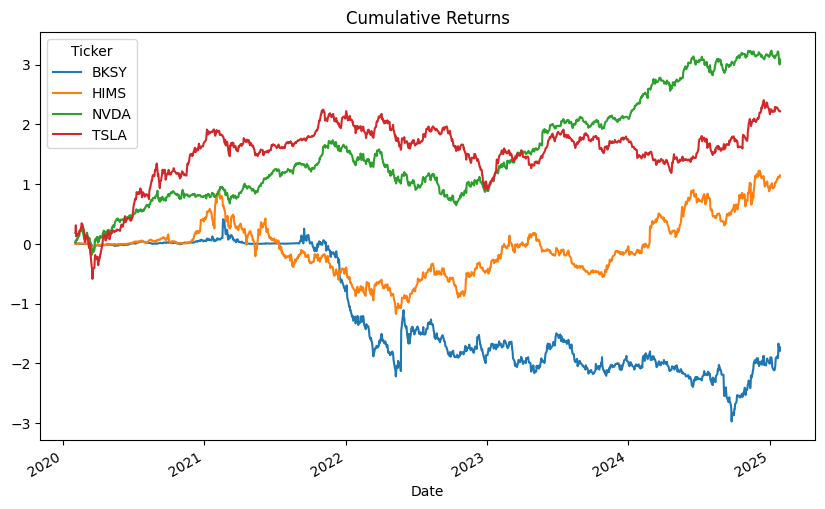

In [100]:
cumulative_log_returns.plot(title = "Cumulative Returns", figsize = (10,6))